In [19]:
import torch
import matplotlib.pyplot as plt
import cv2
import os
import pickle

In [20]:
# get img
img_folder = 'video_temp/labeled/07_training/'
pkl_folder = 'video_temp/labeled/07_training/'
for _,__,img_names in os.walk(img_folder):
    print('fin')

fin


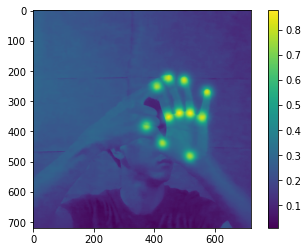

In [66]:
# get pkl
for i in range(1):
    i = 900
    img_name = img_names[i]
    pkl_name = img_name[:-4] + '.pkl'
    
    img = cv2.imread(img_folder+img_name) # y,x,channel
    with open(pkl_folder+pkl_name, 'rb') as f:
        pkl = pickle.load(f) 
    keypoint = pkl['keypoint']
    covered_point = pkl['covered_point']
    
    img = img.transpose((1,0,2)) # get x,y,channel
    img = torch.FloatTensor(img)/255
    
    gts = []
    for i in range(len(keypoint)):
        x,y = keypoint[i]
        gts.append(gen_gts(x,y,720,720,20))
    gts = torch.stack(gts)
    
   
    
    
#     show = img[:,:,0]*0.5+gts_max*0.5
#     plt.imshow(show.transpose(0,1))
#     plt.colorbar()

In [29]:
import torch
def gen_gts(cx,cy,width,height,sigma):
    # cx -> center x
    # cy -> center y
    # width, height of image
    # sigma -> size of heat
    emt = torch.zeros([width,height])
    x, y = torch.where(emt==0)
    distx = (x-cx).float()
    disty = (y-cy).float()
    dist = distx**2+disty**2
    ans = torch.exp(-(dist/sigma**2).float())
    ans = ans.reshape([width,height])
    
    # example code
    # import torch
    # import matplotlib.pyplot as plt
    # a = gen_gts(200,200,400,600,10)
    # plt.imshow(a)
    # plt.colorbar()
    # plt.show()
    
    return ans

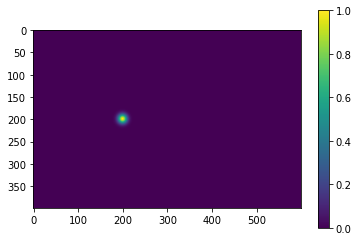

In [30]:
# example code
import torch
import matplotlib.pyplot as plt
a = gen_gts(200,200,400,600,10)
plt.imshow(a)
plt.colorbar()
plt.show()